
## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Data/data-clean.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

#doing this here and not during data cleaning because this split doesnt survive being saved as .csv
df['genres'] = df['genres'].map(lambda x: x.split(","))
df['director'] = df['director'].map(lambda x: x.split(","))

display(df.head(2)), display(df.info()) ,display(df.isna().sum())

,release_year,movie,worldwide_gross,domestic_gross,foreign_gross,production_budget,profit,genres,director,roi_domestic,roi_foreign,roi_worldwide
0,2011,Pirates of the Caribbean: On Stranger Tides 2011,1045663875,241063875,804600000,410600000,635063875,"[Action, Adventure, Fantasy]",[Rob Marshall],-41.29,95.96,154.67
1,2019,Dark Phoenix 2019,149762350,42762350,107000000,350000000,-200237650,"[Action, Adventure, Sci-Fi]",[Simon Kinberg],-87.78,-69.43,-57.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_year       1311 non-null   int64  
 1   movie              1311 non-null   object 
 2   worldwide_gross    1311 non-null   int64  
 3   domestic_gross     1311 non-null   int64  
 4   foreign_gross      1311 non-null   int64  
 5   production_budget  1311 non-null   int64  
 6   profit             1311 non-null   int64  
 7   genres             1311 non-null   object 
 8   director           1311 non-null   object 
 9   roi_domestic       1311 non-null   float64
 10  roi_foreign        1311 non-null   float64
 11  roi_worldwide      1311 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 123.0+ KB


None

release_year         0
movie                0
worldwide_gross      0
domestic_gross       0
foreign_gross        0
production_budget    0
profit               0
genres               0
director             0
roi_domestic         0
roi_foreign          0
roi_worldwide        0
dtype: int64

(None, None, None)

### Business Recommendation 1: Which genres should we create films in? Which genres provide the highest average ROI?

Based on our business problem, we've decided to first conclude which genres these new films should be. We've chosen to do this by calculating the average return on investment for each genre and pulling the top 5 genres.

First we created columns that include domestic, foreign, and worlwide ROI for each movie title in our dataframe. We've also exploded the genre for each movie, so now each genre for each movie has it's own row. This will make it easier to find the average for each genre.

In [2]:
#drop duplicate movie tables
df = df.drop_duplicates(subset='movie', keep='first')

#create a new column that represents the roi for domestic gross
df['roi_domestic'] = (df['domestic_gross'] - df['production_budget']) / df['production_budget'] * 100

#create a new column that represents the roi for foreign gross
df['roi_foreign'] = (df['foreign_gross'] - df['production_budget']) / df['production_budget'] * 100

#create a new column that represents the roi for worlwide gross
df['roi_worldwide'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget'] * 100

df.head(2)

,release_year,movie,worldwide_gross,domestic_gross,foreign_gross,production_budget,profit,genres,director,roi_domestic,roi_foreign,roi_worldwide
0,2011,Pirates of the Caribbean: On Stranger Tides 2011,1045663875,241063875,804600000,410600000,635063875,"[Action, Adventure, Fantasy]",[Rob Marshall],-41.289850,95.957136,154.667286
1,2019,Dark Phoenix 2019,149762350,42762350,107000000,350000000,-200237650,"[Action, Adventure, Sci-Fi]",[Simon Kinberg],-87.782186,-69.428571,-57.210757


In [3]:
#filter the dataframe to only show movies released in the last ten years
df = df.loc[(df['release_year'] >= 2011)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1310
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_year       1311 non-null   int64  
 1   movie              1311 non-null   object 
 2   worldwide_gross    1311 non-null   int64  
 3   domestic_gross     1311 non-null   int64  
 4   foreign_gross      1311 non-null   int64  
 5   production_budget  1311 non-null   int64  
 6   profit             1311 non-null   int64  
 7   genres             1311 non-null   object 
 8   director           1311 non-null   object 
 9   roi_domestic       1311 non-null   float64
 10  roi_foreign        1311 non-null   float64
 11  roi_worldwide      1311 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 133.1+ KB


In [4]:
#the genres for each movie are in a list. I need to seperate the genres so i can perform further analysis
genres_exp = df.explode('genres')#,ignore_index=True) 
genres_exp['genres'].unique()

array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Western',
       'Family', 'Crime', 'Comedy', 'Animation', 'Horror', 'Drama',
       'Romance', 'Mystery', 'Musical', 'History', 'Documentary',
       'Biography', 'War', 'Sport', 'Music'], dtype=object)

Now that that's out of the way, we can begin to find the median ROI for each genre. We've chosen to use median because the data contains many outliers which would make the mean a less accurate representation of average ROI. We'll be choosing the top 5 genres based on their worlwide ROI, since this is a better indication of each films total ROI.

In [5]:
#I created a new dataframe that by genres and took the median for each column
filtered_df_median = genres_exp.groupby('genres').median()
#I am sorting the genres in descending order and only looking at the top 5 genres
filtered_df_median = filtered_df_median.sort_values(by=['roi_worldwide'], ascending = False)
filtered_df_median.head(5)

,release_year,worldwide_gross,domestic_gross,foreign_gross,production_budget,profit,roi_domestic,roi_foreign,roi_worldwide
genres,,,,,,,,,
Mystery,2015.0,45173738.0,25801570.0,26064449.0,12000000.0,36785387.0,56.965319,55.904993,227.818077
Animation,2014.5,298374416.0,107514024.0,177037019.5,80000000.0,172705121.0,5.784405,83.082221,198.188978
Musical,2013.5,55929699.0,21173039.5,34756659.5,39150000.0,20763733.0,-49.429681,42.465095,173.752303
Sci-Fi,2014.0,242981799.0,79042440.0,164259216.0,93000000.0,128564919.0,-8.206552,69.339398,168.386218
Adventure,2015.0,232342837.5,80085291.5,154937420.5,100000000.0,126986053.0,-8.951864,53.815108,162.363957


> Great, let's see those roi_worldwide averages compared visually


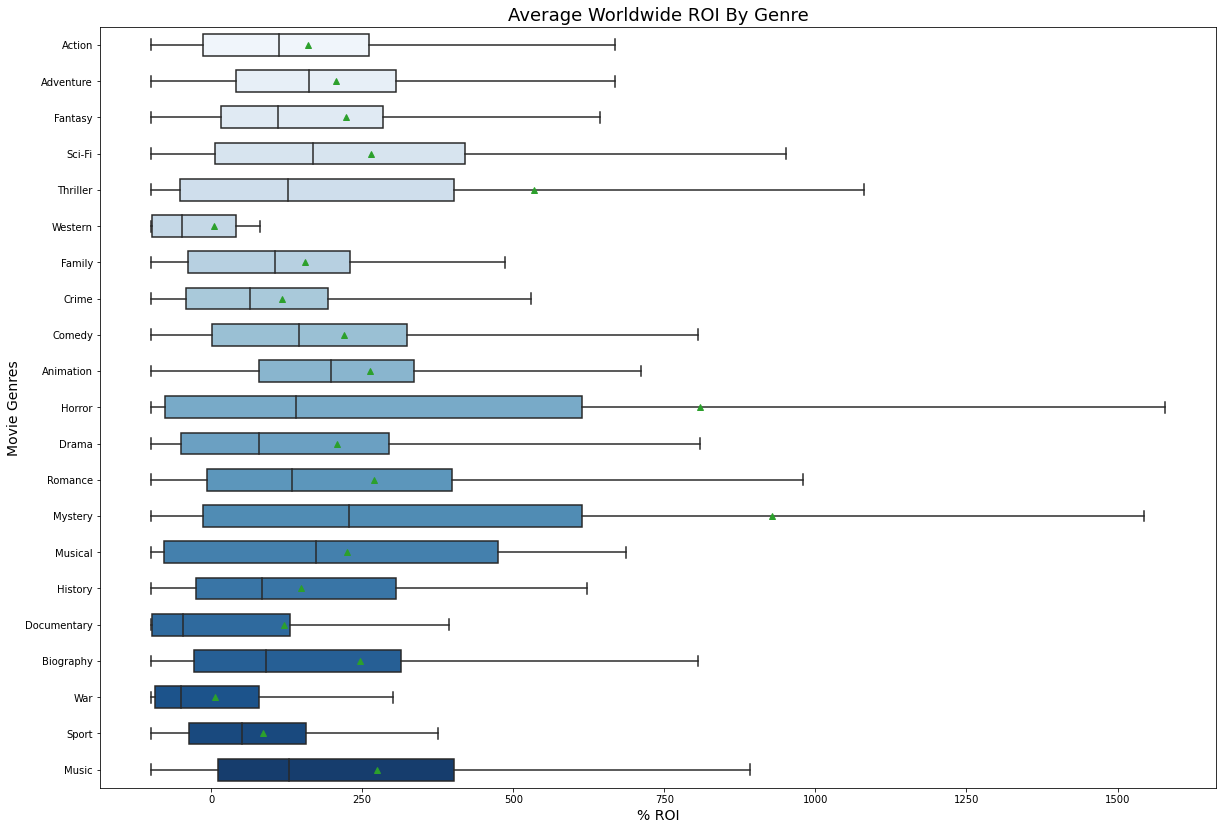

In [6]:
#creating a boxplot with the median and IDR for each genre
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=genres_exp["genres"], 
            x=genres_exp["roi_worldwide"], 
            palette="Blues", 
            width=0.6, 
            #removing outliers
            showfliers = False,
            #adding a green dot that shows mean for each genre
            showmeans = True);

#creating labels for my boxplot
plt.xlabel("% ROI", size=14)
plt.ylabel("Movie Genres", size=14)
plt.title("Average Worldwide ROI By Genre", size=18)
plt.show()

>We want to clear some of this noise and look only at the top 5 performing genres based on that average  worldwide ROI.

In [7]:
#creating an individual dataframe for each genre in my filtered_df_median dataframe
genres=genres_exp['genres'].unique().tolist()
musical = genres_exp.loc[genres_exp.genres=='Musical']
mystery = genres_exp.loc[genres_exp.genres=='Mystery']
scifi = genres_exp.loc[genres_exp.genres=='Sci-Fi']
adventure = genres_exp.loc[genres_exp.genres=='Adventure']
animation = genres_exp.loc[genres_exp.genres=='Animation']

In [8]:
#create a new dataframe with the top five average roi worldwide
top_5_ww = adventure.append(animation)
top_5_ww = top_5_ww.append(musical)
top_5_ww = top_5_ww.append(mystery)
top_5_ww = top_5_ww.append(scifi)

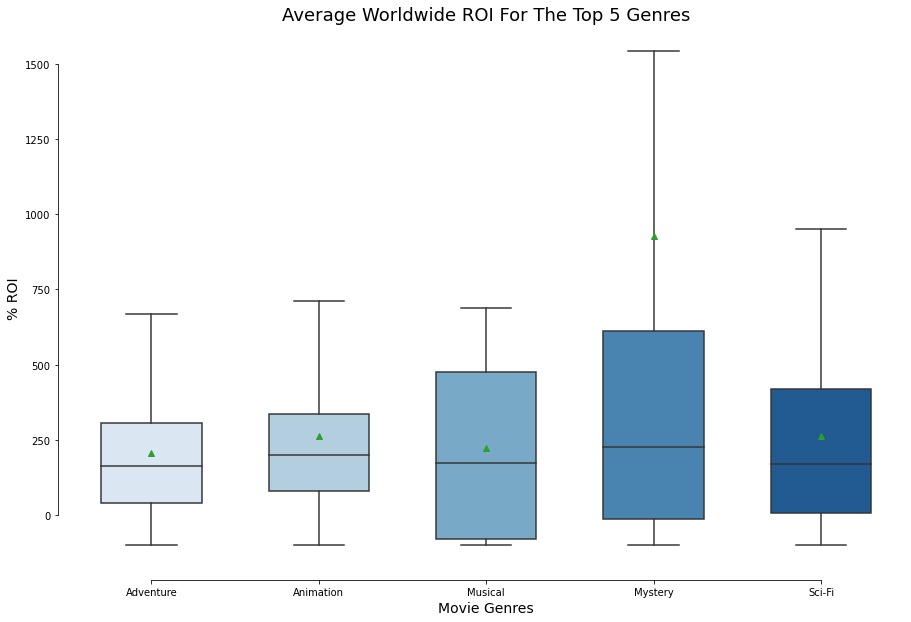

In [9]:
#create a box plot with all 5 top genres comparing median and mean
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( x=top_5_ww["genres"], 
            y=top_5_ww["roi_worldwide"], 
            palette="Blues", 
            width=0.6, 
            showfliers = False, 
            showmeans=True);


plt.ylabel("% ROI", size=14)
plt.xlabel("Movie Genres", size=14)
plt.title("Average Worldwide ROI For The Top 5 Genres", size=18)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Hide the vertical gridlines

sns.despine(offset=10, trim=True)
plt.show()

In [10]:
#let's predict worst, base, and best case scenarios for each genre
arr = adventure['roi_worldwide']
arr2 = animation['roi_worldwide']
arr3 = musical['roi_worldwide']
arr4 = mystery['roi_worldwide']
arr5 = scifi['roi_worldwide']
print(f'Adventure ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Musical ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Sci-fi ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Adventure ROI: 
  Worst Case = 41% 
  Base Case = 162% 
  Best Case = 305%
Animation ROI: 
  Worst Case = 78% 
  Base Case = 198% 
  Best Case = 335%
Musical ROI: 
  Worst Case = -78% 
  Base Case = 173% 
  Best Case = 474%
Mystery ROI: 
  Worst Case = -13% 
  Base Case = 227% 
  Best Case = 613%
Sci-fi ROI: 
  Worst Case = 5% 
  Base Case = 168% 
  Best Case = 420%


We next decided to take a look at how each genre performed domestically, to see if it was necessary to release films in foreign countries. We were also curious to know if the top 5 genres in the USA were different than the top 5 genres worldwide

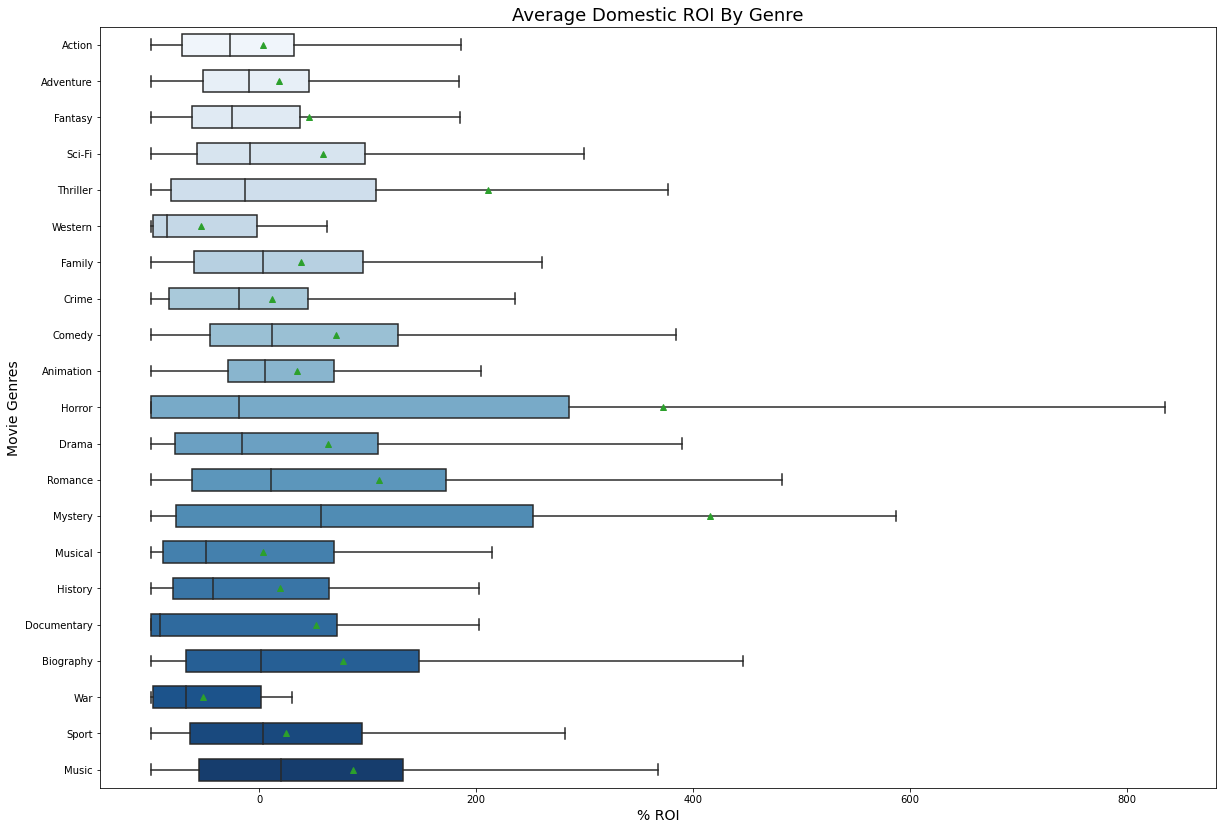

In [11]:
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( y=genres_exp["genres"], 
            x=genres_exp["roi_domestic"], 
            palette="Blues", 
            width=0.6, 
            showfliers = False, 
            showmeans=True);

plt.xlabel("% ROI", size=14)
plt.ylabel("Movie Genres", size=14)
plt.title("Average Domestic ROI By Genre", size=18)
plt.show()

In [12]:
#i know this worked because my rows went down from 5310 to 3945
filtered_df_median_dom = genres_exp.groupby('genres').median()
filtered_df_median_dom = filtered_df_median.sort_values(by=['roi_domestic'], ascending = False)
filtered_df_median_dom.head(5)

,release_year,worldwide_gross,domestic_gross,foreign_gross,production_budget,profit,roi_domestic,roi_foreign,roi_worldwide
genres,,,,,,,,,
Mystery,2015.0,45173738.0,25801570.0,26064449.0,12000000.0,36785387.0,56.965319,55.904993,227.818077
Music,2014.0,31157914.0,16376066.0,7835022.0,14500000.0,11001573.0,20.438264,-38.546933,128.700183
Comedy,2014.0,62758010.0,37243418.0,23046889.0,28000000.0,31239258.0,11.473743,-11.529117,144.709156
Romance,2014.0,37682552.0,18729727.5,11190158.0,16000000.0,15492694.5,10.848518,-19.633567,133.868173
Animation,2014.5,298374416.0,107514024.0,177037019.5,80000000.0,172705121.0,5.784405,83.082221,198.188978


>It looks like our top 5 genres in the USA are different from our top 5 genres in the world. Only two genres (mystery and animation) are in the top 5 for domestic and worlwide ROI. 

We next wanted to see the worst, base, and best case ROI for the top 5 genres in the USA

In [13]:
comedy = genres_exp.loc[genres_exp.genres=='Comedy']
music = genres_exp.loc[genres_exp.genres=='Music']
romance = genres_exp.loc[genres_exp.genres=='Romance']

In [14]:
top_5_df_domestic= animation.append(comedy)
top_5_df_domestic['genres'].unique()

array(['Animation', 'Comedy'], dtype=object)

In [15]:
top_5_df_domestic = top_5_df_domestic.append(music)
top_5_df_domestic['genres'].unique()

array(['Animation', 'Comedy', 'Music'], dtype=object)

In [16]:
top_5_df_domestic = top_5_df_domestic.append(mystery)
top_5_df_domestic['genres'].unique()

array(['Animation', 'Comedy', 'Music', 'Mystery'], dtype=object)

In [17]:
top_5_df_domestic = top_5_df_domestic.append(romance)
top_5_df_domestic['genres'].unique()

array(['Animation', 'Comedy', 'Music', 'Mystery', 'Romance'], dtype=object)

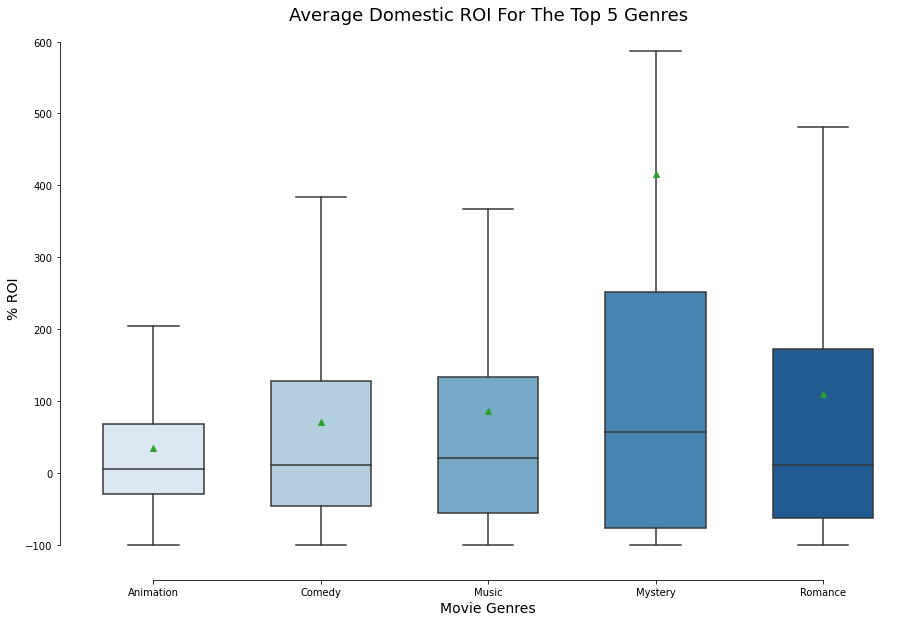

In [18]:
#created a box plot with top 5 genres in roi_domestic based on median
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( x=top_5_df_domestic["genres"], 
            y=top_5_df_domestic["roi_domestic"], 
            palette="Blues", 
            width=0.6, 
            showfliers = False, 
            showmeans=True,
            data=top_5_df_domestic.groupby('roi_domestic', as_index=False).median());

plt.ylabel("% ROI", size=14)
plt.xlabel("Movie Genres", size=14)
plt.title("Average Domestic ROI For The Top 5 Genres", size=18)
#sns.stripplot(x="genres", y="roi_domestic", data=top_5_df_domestic)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
sns.despine(offset=10, trim=True)
plt.show()

In [19]:
#let's predict worst, base, and best case scenarios for each genre
arr = animation['roi_domestic']
arr2 = comedy['roi_domestic']
arr3 = music['roi_domestic']
arr4 = mystery['roi_domestic']
arr5 = romance['roi_domestic']
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Comedy ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Music ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Romance ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Animation ROI: 
  Worst Case = -28% 
  Base Case = 5% 
  Best Case = 68%
Comedy ROI: 
  Worst Case = -45% 
  Base Case = 11% 
  Best Case = 127%
Music ROI: 
  Worst Case = -55% 
  Base Case = 20% 
  Best Case = 133%
Mystery ROI: 
  Worst Case = -76% 
  Base Case = 56% 
  Best Case = 252%
Romance ROI: 
  Worst Case = -61% 
  Base Case = 10% 
  Best Case = 172%


### Business Recommendation 1: Conclusions

From what we see in the graph above and based on worst, base, and best case scenarios for each genre, we should create films in the adventure and animation genres. Although their best case ROI predictions are not as high as the mystery and musical genres, their worst case ROI predications are both far above 0%. 

All movies, no matter the genre, should be released worldwide and not just domestically, the worst case ROI predictions for each of the top 5 genres with highest average domestic ROI is below -25%.

# Question 3:
### Does the average ROI by genre follow a similar trend when compared between domestic and foreign markets?


# Question 3:
### Does the average ROI by genre follow a similar trend when compared between domestic and foreign markets?


In [20]:
#drop dupes
df = df.drop_duplicates(subset='movie', keep='first')
df.shape

(1311, 12)

In [21]:
# creating Q3 dataframe
# ADD COLUMNS 'DOMESTIC ROI', 'FOREIGN ROI', 'WORLDWIDE ROI'
# note: might not need to add these columns if Samantha already did it

Q3_df = df

Q3_df['ROI_domestic'] = ((Q3_df['domestic_gross'] - Q3_df['production_budget']) / Q3_df['production_budget']) * 100
                               
Q3_df['ROI_foreign'] = ((Q3_df['foreign_gross'] - Q3_df['production_budget']) / Q3_df['production_budget']) * 100
                              
Q3_df['ROI_worldwide'] = ((Q3_df['worldwide_gross'] - Q3_df['production_budget']) / Q3_df['production_budget']) * 100

Q3_df['year'] = pd.DatetimeIndex(Q3_df['release_year']).year

Q3_df = Q3_df.loc[(Q3_df['year'] > 2010)]

Q3_df.shape

(0, 16)

In [22]:
#separate each genre of a movie into their own row
exploded_df = Q3_df.explode('genres')
exploded_df.head()

,release_year,movie,worldwide_gross,domestic_gross,foreign_gross,production_budget,profit,genres,director,roi_domestic,roi_foreign,roi_worldwide,ROI_domestic,ROI_foreign,ROI_worldwide,year


In [23]:
exploded_df['genres'].value_counts()

Series([], Name: genres, dtype: int64)

In [24]:
# determine top 5 genres (ROI-worldwide) by creating a new dataframe
top5_Q3_df = exploded_df[['genres', 'ROI_domestic', 'ROI_foreign','ROI_worldwide']].copy()
top5_Q3_df.head()

,genres,ROI_domestic,ROI_foreign,ROI_worldwide


In [25]:
# group dataframe by genres and calculate median
grouped_by_genres = top5_Q3_df.groupby('genres').median()
grouped_by_genres

,ROI_domestic,ROI_foreign,ROI_worldwide
genres,,,


In [26]:
#get top genres sorted by WORLDWIDE ROI
roi_genres = grouped_by_genres.sort_values(by=['ROI_worldwide'], ascending = False)
roi_genres.head(10)

,ROI_domestic,ROI_foreign,ROI_worldwide
genres,,,


In [27]:
#isolate top 5 genres (ROI Worldwide) from original dataframe
# am I calculating my ROI world wide wrong? SAMANTHA DIFF: HER COMEDY VS MY THRILLER

mystery_df = exploded_df.loc[(exploded_df['genres'] == 'Mystery')]

animation_df = exploded_df.loc[(exploded_df['genres'] == 'Animation')]

musical_df = exploded_df.loc[(exploded_df['genres'] == 'Musical')]

scifi_df = exploded_df.loc[(exploded_df['genres'] == 'Sci-Fi')]

adventure_df = exploded_df.loc[(exploded_df['genres'] == 'Adventure')]



In [28]:
#group by year
mys2 = mystery_df.groupby('year').median()

ani2 = animation_df.groupby('year').median()

mus2 = musical_df.groupby('year').median()

scifi2 = scifi_df.groupby('year').median()

adv2 = adventure_df.groupby('year').median()

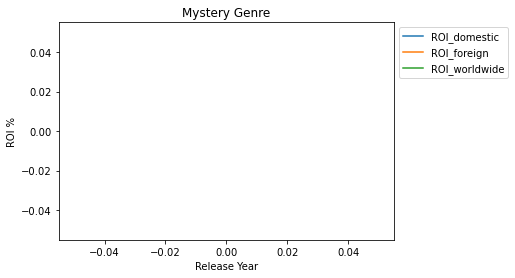

In [29]:
# plot the dataframes
mys2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Mystery Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);


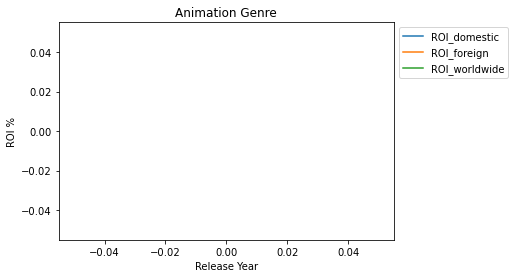

In [30]:
ani2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Animation Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

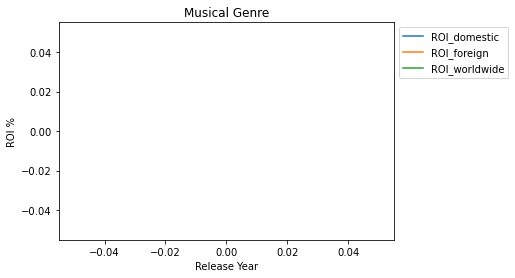

In [31]:
mus2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Musical Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

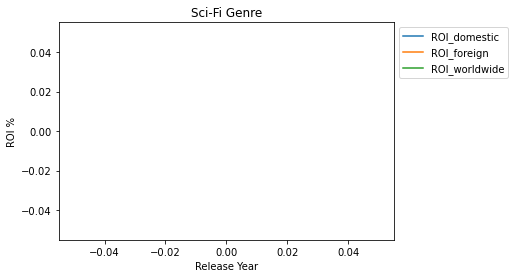

In [32]:
scifi2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Sci-Fi Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

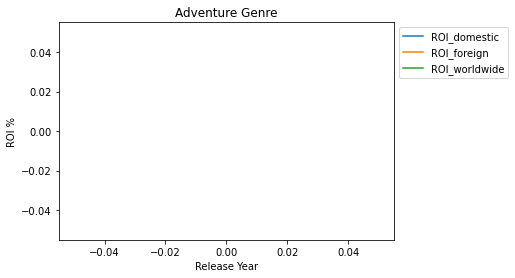

In [33]:
adv2.loc[:,['ROI_domestic', 'ROI_foreign', 'ROI_worldwide']].plot();
plt.xlabel('Release Year')
plt.ylabel('ROI %')
plt.title('Adventure Genre')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

In [34]:
Q3_df.corr()

,release_year,worldwide_gross,domestic_gross,foreign_gross,production_budget,profit,roi_domestic,roi_foreign,roi_worldwide,ROI_domestic,ROI_foreign,ROI_worldwide,year
release_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
worldwide_gross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domestic_gross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
foreign_gross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_budget,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roi_domestic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roi_foreign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roi_worldwide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROI_domestic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 3 Conclusion
### Does the average ROI by genre follow a similar trend when compared between domestic and foreign markets?

#### The average ROI for the top 5 genres over the past decade shows that there is a bigger return on investment in the foreign market vs the domestic market for Adventure, Sci-Fi, Animation, and potentially Musical movies. The Mystery Genre's domestic and foreign ROI follow the same general positive trend over time.

#### Each genre's domestic ROI hovers around 0% except for Mystery movies that generally maintains a postive trajectory. There are a few outliers in the musical and mystery genre, but the foreign ROI generally performs better than the domestic ROI. 

#### Based on this section of the analysis, Microsoft's movie studios should focus on producing Adventure, Sci-Fi, and Animation movies because of their greater foreign ROI potential.



In [35]:
print(f'This cleaned data includes movies from {df.release_year.min()} to {df.release_year.max()}.')

This cleaned data includes movies from 2011 to 2020.


In [36]:
#D ropping unnessary columns for the 3rd question
df.drop(['release_year'],axis=1,inplace=True)

In [37]:
# Finding top 10 movies by 'worldwide_gross'
top10_worldwide = df.sort_values(by='worldwide_gross', ascending=False).head(10)
top10_worldwide = top10_worldwide.set_index('movie')
top10_worldwide

,worldwide_gross,domestic_gross,foreign_gross,production_budget,profit,genres,director,roi_domestic,roi_foreign,roi_worldwide,ROI_domestic,ROI_foreign,ROI_worldwide,year
movie,,,,,,,,,,,,,,
Avengers: Infinity War 2018,2048134200,678815482,1369318718,300000000,1748134200,"[Action, Adventure, Sci-Fi]","[Anthony Russo, Joe Russo]",126.271827,356.439573,582.711400,126.271827,356.439573,582.711400,1970
Jurassic World 2015,1648854864,652270625,996584239,215000000,1433854864,"[Action, Adventure, Sci-Fi]",[Colin Trevorrow],203.381686,363.527553,666.909239,203.381686,363.527553,666.909239,1970
Furious 7 2015,1518722794,353007020,1165715774,190000000,1328722794,"[Action, Crime, Thriller]",[James Wan],85.793168,513.534618,699.327786,85.793168,513.534618,699.327786,1970
The Avengers 2012,1517935897,623279547,894656350,225000000,1292935897,"[Action, Adventure, Sci-Fi]",[Joss Whedon],177.013132,297.625044,574.638176,177.013132,297.625044,574.638176,1970
Avengers: Age of Ultron 2015,1403013963,459005868,944008095,330600000,1072413963,"[Action, Adventure, Sci-Fi]",[Joss Whedon],38.840250,185.543888,324.384139,38.840250,185.543888,324.384139,1970
Black Panther 2018,1348258224,700059566,648198658,200000000,1148258224,"[Action, Adventure, Sci-Fi]",[Ryan Coogler],250.029783,224.099329,574.129112,250.029783,224.099329,574.129112,1970
Jurassic World: Fallen Kingdom 2018,1305772799,417719760,888053039,170000000,1135772799,"[Action, Adventure, Sci-Fi]",[J.A. Bayona],145.717506,422.384141,668.101646,145.717506,422.384141,668.101646,1970
Frozen 2013,1272469910,400738009,871731901,150000000,1122469910,"[Adventure, Animation, Comedy]","[Chris Buck, Jennifer Lee]",167.158673,481.154601,748.313273,167.158673,481.154601,748.313273,1970
Beauty and the Beast 2017,1259199706,504014165,755185541,160000000,1099199706,"[Family, Fantasy, Musical]",[Bill Condon],215.008853,371.990963,686.999816,215.008853,371.990963,686.999816,1970


In [38]:
# Fiding top 10 movies by 'domestic_gross'
#top10_domestic = df.sort_values(by='domestic_gross', ascending=False).head(10)
#top10_domestic = top10_domestic.set_index('movie')
#top10_domestic

In [39]:
#fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
#ax.barh(top10_worldwide.index, top10_worldwide["worldwide_gross"])
#ax2.barh(top10_domestic.index, top10_domestic["domestic_gross"])

#ax.set_xlabel("Worldwide Gross")
#ax2.set_xlabel("Domestic Gross")
#ax.set_title("Top 10 Movies Worldwide 2011-2020")
#ax2.set_title("Top 10 Movies Domestic 2011-2020");
#ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
#ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

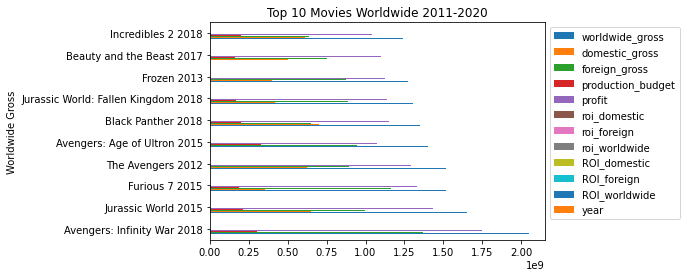

In [40]:
# Visualizing data (bar chart, stacked chart)
ax1 = top10_worldwide.plot(kind='barh')
#ax2 = top10_domestic.plot(kind='barh')        
ax1.set_ylabel("Worldwide Gross")
#ax2.set_ylabel("Domestic Gross")
ax1.set_title("Top 10 Movies Worldwide 2011-2020")
#ax2.set_title("Top 10 Movies Domestic 2011-2020")
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
#ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

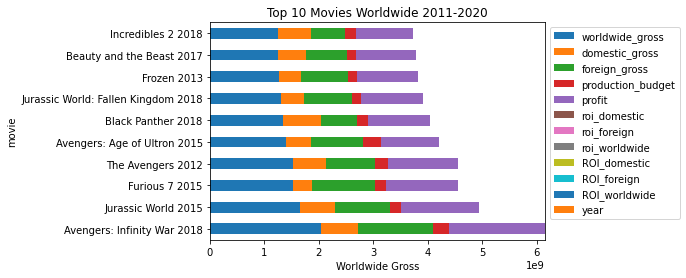

In [41]:
ax1 = top10_worldwide.plot(kind='barh', stacked=True, title='Top 10 Movies Worldwide 2011-2020')
#ax2 = top10_domestic.plot(kind='barh', stacked=True, title='Top 10 Movies Domestic 2011-2020')
ax1.set_xlabel("Worldwide Gross")
#ax2.set_xlabel("Domestic Gross")
ax1.set_title("Top 10 Movies Worldwide 2011-2020")
#ax2.set_title("Top 10 Movies Domestic 2011-2020")
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
#ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

In [42]:
### Answering Q3: Is there any particular director/producer who appears frequently in the above findings?

In [43]:
print(f"The directors who appear the most in 'the top 10 movies by worldwide gross' are {top10_worldwide['director'].value_counts().head(2)}.")

The directors who appear the most in 'the top 10 movies by worldwide gross' are [Joss Whedon]    2
[J.A. Bayona]    1
Name: director, dtype: int64.


In [44]:
### Finding correlation between directors' productivity and profit

In [45]:
# Making 'director' column to individaul director per row
#df['director'] = df['director'].map(lambda x: x.split(","))
individual_df = df.explode('director')
individual_df

,movie,worldwide_gross,domestic_gross,foreign_gross,production_budget,profit,genres,director,roi_domestic,roi_foreign,roi_worldwide,ROI_domestic,ROI_foreign,ROI_worldwide,year
0,Pirates of the Caribbean: On Stranger Tides 2011,1045663875,241063875,804600000,410600000,635063875,"[Action, Adventure, Fantasy]",Rob Marshall,-41.289850,95.957136,154.667286,-41.289850,95.957136,154.667286,1970
1,Dark Phoenix 2019,149762350,42762350,107000000,350000000,-200237650,"[Action, Adventure, Sci-Fi]",Simon Kinberg,-87.782186,-69.428571,-57.210757,-87.782186,-69.428571,-57.210757,1970
2,Avengers: Age of Ultron 2015,1403013963,459005868,944008095,330600000,1072413963,"[Action, Adventure, Sci-Fi]",Joss Whedon,38.840250,185.543888,324.384139,38.840250,185.543888,324.384139,1970
3,Avengers: Infinity War 2018,2048134200,678815482,1369318718,300000000,1748134200,"[Action, Adventure, Sci-Fi]",Anthony Russo,126.271827,356.439573,582.711400,126.271827,356.439573,582.711400,1970
3,Avengers: Infinity War 2018,2048134200,678815482,1369318718,300000000,1748134200,"[Action, Adventure, Sci-Fi]",Joe Russo,126.271827,356.439573,582.711400,126.271827,356.439573,582.711400,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Emily 2017,3547,3547,0,27000,-23453,[Drama],Ryan Graves,-86.862963,-100.000000,-86.862963,-86.862963,-100.000000,-86.862963,1970
1307,Exeter 2015,489792,0,489792,25000,464792,"[Horror, Mystery, Thriller]",Marcus Nispel,-100.000000,1859.168000,1859.168000,-100.000000,1859.168000,1859.168000,1970
1308,Dutch Kills 2015,0,0,0,25000,-25000,"[Crime, Drama, Thriller]",Joseph Mazzella,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,1970
1309,The Ridges 2011,0,0,0,17300,-17300,"[Drama, Horror, Thriller]",Brandon Landers,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,1970


In [46]:
# Counting movies made by each director
individual_df['director'].value_counts()

Tim Story             8
Steven Spielberg      7
Clint Eastwood        6
Jon M. Chu            5
Jonathan Levine       5
                     ..
Darren Aronofsky      1
Ahsan Rahim           1
Ken Marino            1
Hans Petter Moland    1
John Lee Hancock      1
Name: director, Length: 1016, dtype: int64

In [47]:
# Creating a column that shows the number of movies made by the individual director
individual_df['#movies_by_director'] = individual_df.groupby(['director'])['movie'].transform('count')

# Dropping unnecessary columns and organizing the dataframe by 'director' and 'movie'
individual_df = individual_df.drop(['production_budget', 'domestic_gross', 'foreign_gross'], axis=1)
individual_df.groupby(by=['director', 'movie']).sum().head(20)

,,worldwide_gross,profit,roi_domestic,roi_foreign,roi_worldwide,ROI_domestic,ROI_foreign,ROI_worldwide,year,#movies_by_director
director,movie,,,,,,,,,,
Aaron T. Wells,Girls Gone Dead 2012,0,-500000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,1970,1
Abby Kohn,I Feel Pretty 2018,91553797,59553797,52.486253,33.619363,186.105616,52.486253,33.619363,186.105616,1970,1
Adam Montierth,Locker 13 2014,3496,-296504,-98.834667,-100.000000,-98.834667,-98.834667,-100.000000,-98.834667,1970,1
Adrian Molina,Coco 2017,798008101,623008101,19.843437,236.161192,356.004629,19.843437,236.161192,356.004629,1970,1
Al Franklin,Teeth and Blood 2015,0,-300000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,1970,1
Alessandro Carloni,Kung Fu Panda 3 2016,517599142,377599142,2.520442,167.193231,269.713673,2.520442,167.193231,269.713673,1970,1
Angus MacLane,Finding Dory 2016,1021215193,821215193,143.147781,167.459816,410.607596,143.147781,167.459816,410.607596,1970,1
Anna Boden,Captain Marvel 2019,1123061550,948061550,143.729115,298.020342,541.749457,143.729115,298.020342,541.749457,1970,1
Anthony Stacchi,The Boxtrolls 2014,111946251,51946251,-15.271158,1.848243,86.577085,-15.271158,1.848243,86.577085,1970,1


In [48]:
# Creating a column that shows the average profit made by the individual director
individual_df['avg_profit'] = individual_df.groupby(['director'])['profit'].transform('mean')
individual_df['avg_world_gross'] = individual_df.groupby(['director'])['worldwide_gross'].transform('mean')
individual_df.groupby(by=['director', 'movie']).sum().head(20)

,,worldwide_gross,profit,roi_domestic,roi_foreign,roi_worldwide,ROI_domestic,ROI_foreign,ROI_worldwide,year,#movies_by_director,avg_profit,avg_world_gross
director,movie,,,,,,,,,,,,
Aaron T. Wells,Girls Gone Dead 2012,0,-500000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,1970,1,-500000.0,0.000000e+00
Abby Kohn,I Feel Pretty 2018,91553797,59553797,52.486253,33.619363,186.105616,52.486253,33.619363,186.105616,1970,1,59553797.0,9.155380e+07
Adam Montierth,Locker 13 2014,3496,-296504,-98.834667,-100.000000,-98.834667,-98.834667,-100.000000,-98.834667,1970,1,-296504.0,3.496000e+03
Adrian Molina,Coco 2017,798008101,623008101,19.843437,236.161192,356.004629,19.843437,236.161192,356.004629,1970,1,623008101.0,7.980081e+08
Al Franklin,Teeth and Blood 2015,0,-300000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,1970,1,-300000.0,0.000000e+00
Alessandro Carloni,Kung Fu Panda 3 2016,517599142,377599142,2.520442,167.193231,269.713673,2.520442,167.193231,269.713673,1970,1,377599142.0,5.175991e+08
Angus MacLane,Finding Dory 2016,1021215193,821215193,143.147781,167.459816,410.607596,143.147781,167.459816,410.607596,1970,1,821215193.0,1.021215e+09
Anna Boden,Captain Marvel 2019,1123061550,948061550,143.729115,298.020342,541.749457,143.729115,298.020342,541.749457,1970,1,948061550.0,1.123062e+09
Anthony Stacchi,The Boxtrolls 2014,111946251,51946251,-15.271158,1.848243,86.577085,-15.271158,1.848243,86.577085,1970,1,51946251.0,1.119463e+08


In [49]:
# Checking correlation between directors' productivity and profit
individual_df.corr()['#movies_by_director'].sort_values()


roi_foreign            0.014474
ROI_foreign            0.014474
roi_worldwide          0.020852
ROI_worldwide          0.020852
roi_domestic           0.025842
ROI_domestic           0.025842
profit                 0.164542
avg_profit             0.187759
worldwide_gross        0.189231
avg_world_gross        0.213257
#movies_by_director    1.000000
year                        NaN
Name: #movies_by_director, dtype: float64

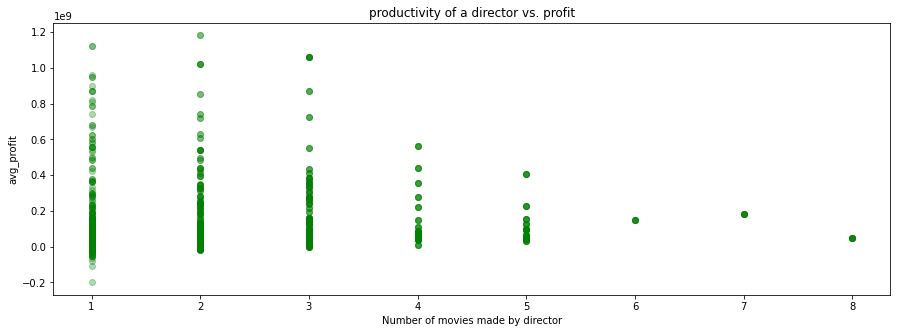

In [50]:
# Scatter plot of the relationship between directors' productivity and profit
fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(individual_df['#movies_by_director'], individual_df['avg_profit'], alpha=0.3, color="green")
ax.set_title("productivity of a director vs. profit")
ax.set_xlabel("Number of movies made by director")
ax.set_ylabel("avg_profit");

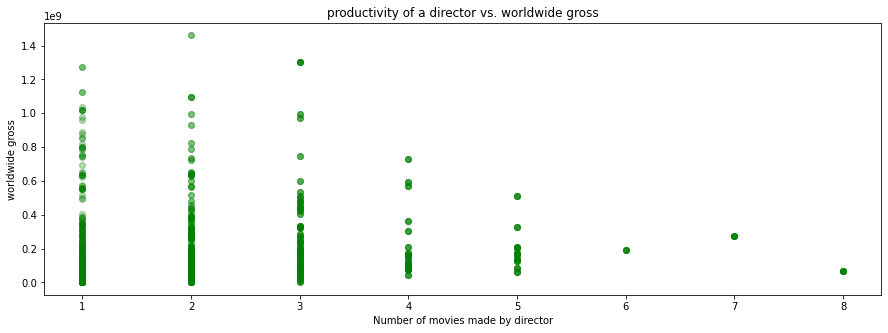

In [51]:
# Scatter plot of the relationship between directors' productivity and worldwide gross
fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(individual_df['#movies_by_director'], individual_df['avg_world_gross'], alpha=0.3, color="green")
ax.set_title("productivity of a director vs. worldwide gross")
ax.set_xlabel("Number of movies made by director")
ax.set_ylabel("worldwide gross");